In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/cancer_classification.csv")

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# Part 1 - EDA and Preprocessing

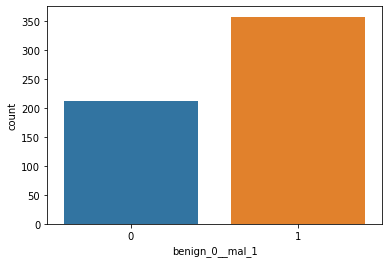

In [4]:
# shows a bit of the distribution
sns.countplot(x="benign_0__mal_1", data=df);

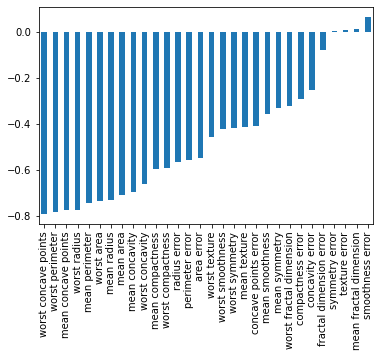

In [5]:
# shows the correlation to the label, can we expect good predictions?
df.corr().benign_0__mal_1[:-1].sort_values().plot(kind="bar");

In [6]:
# plt.figure(figsize=(10,6))
# sns.heatmap(df.corr());

In [7]:
X = df.drop("benign_0__mal_1", axis=1).values
y = df.benign_0__mal_1.values

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()

In [12]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Part 2 - Dealing with Overfitting and Evaluation

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [14]:
X_train.shape

(426, 30)

In [15]:
model = Sequential()

model.add(Dense(30, activation="relu"))
model.add(Dense(15, activation="relu"))

# sigmoid for binary data (end result is only 0 or 1)
model.add(Dense(1, activation="sigmoid"))

# binary_crossentropy for binary data
model.compile(loss="binary_crossentropy", optimizer="adam")

In [16]:
model.fit(X_train, y_train, epochs=600, validation_data=(X_test, y_test)) # large number of epochs to show overfit

Epoch 1/600
14/14 [==============================] - 1s 60ms/step - loss: 0.6887 - val_loss: 0.6582
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6406 - val_loss: 0.6141
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5934 - val_loss: 0.5761
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5557 - val_loss: 0.5349
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5029 - val_loss: 0.4951
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4779 - val_loss: 0.4563
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4352 - val_loss: 0.4175
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4001 - val_loss: 0.3822
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3707 - val_loss: 0.3473
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3485 - val_loss: 0.3199
Epoch 11

Epoch 83/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0629 - val_loss: 0.1100
Epoch 84/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0409 - val_loss: 0.1235
Epoch 85/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0416 - val_loss: 0.1182
Epoch 86/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0470 - val_loss: 0.1161
Epoch 87/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0450 - val_loss: 0.1159
Epoch 88/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0367 - val_loss: 0.1156
Epoch 89/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0495 - val_loss: 0.1157
Epoch 90/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0565 - val_loss: 0.1186
Epoch 91/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0465 - val_loss: 0.1108
Epoch 92/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0521 - val_loss: 0.1153


14/14 [==============================] - 0s 5ms/step - loss: 0.0485 - val_loss: 0.1537
Epoch 165/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0324 - val_loss: 0.1246
Epoch 166/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0454 - val_loss: 0.1339
Epoch 167/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0451 - val_loss: 0.1349
Epoch 168/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0269 - val_loss: 0.1404
Epoch 169/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0369 - val_loss: 0.1315
Epoch 170/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0323 - val_loss: 0.1379
Epoch 171/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0362 - val_loss: 0.1390
Epoch 172/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0398 - val_loss: 0.1294
Epoch 173/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0346 - val_loss: 0.1414
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.0306 - val_loss: 0.1621
Epoch 246/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0262 - val_loss: 0.1512
Epoch 247/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0258 - val_loss: 0.1563
Epoch 248/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0333 - val_loss: 0.1455
Epoch 249/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0371 - val_loss: 0.1712
Epoch 250/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0349 - val_loss: 0.1429
Epoch 251/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0393 - val_loss: 0.1563
Epoch 252/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0271 - val_loss: 0.1474
Epoch 253/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0327 - val_loss: 0.1636
Epoch 254/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0263 - val_loss: 0.1581
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0173 - val_loss: 0.1742
Epoch 327/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0277 - val_loss: 0.1817
Epoch 328/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0189 - val_loss: 0.2003
Epoch 329/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0264 - val_loss: 0.1822
Epoch 330/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0278 - val_loss: 0.1859
Epoch 331/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0181 - val_loss: 0.1905
Epoch 332/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0248 - val_loss: 0.1870
Epoch 333/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0175 - val_loss: 0.1923
Epoch 334/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0184 - val_loss: 0.1959
Epoch 335/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0217 - val_loss: 0.1856
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0267 - val_loss: 0.2297
Epoch 408/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0242 - val_loss: 0.2500
Epoch 409/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0250 - val_loss: 0.2226
Epoch 410/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0182 - val_loss: 0.2261
Epoch 411/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0158 - val_loss: 0.2349
Epoch 412/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0156 - val_loss: 0.2256
Epoch 413/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0151 - val_loss: 0.2353
Epoch 414/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0149 - val_loss: 0.2313
Epoch 415/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0211 - val_loss: 0.2414
Epoch 416/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0156 - val_loss: 0.2344
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0119 - val_loss: 0.3236
Epoch 489/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0233 - val_loss: 0.2715
Epoch 490/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0180 - val_loss: 0.2857
Epoch 491/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0168 - val_loss: 0.2906
Epoch 492/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0168 - val_loss: 0.2793
Epoch 493/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0135 - val_loss: 0.2804
Epoch 494/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0188 - val_loss: 0.2910
Epoch 495/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0087 - val_loss: 0.2960
Epoch 496/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0131 - val_loss: 0.2721
Epoch 497/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0193 - val_loss: 0.2903
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0124 - val_loss: 0.3240
Epoch 570/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0077 - val_loss: 0.3478
Epoch 571/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0107 - val_loss: 0.3357
Epoch 572/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0272 - val_loss: 0.3156
Epoch 573/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0169 - val_loss: 0.3382
Epoch 574/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0107 - val_loss: 0.3549
Epoch 575/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0097 - val_loss: 0.3176
Epoch 576/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0204 - val_loss: 0.3438
Epoch 577/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0118 - val_loss: 0.3466
Epoch 578/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0091 - val_loss: 0.3597
Epoc

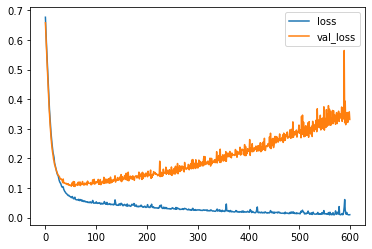

In [18]:
pd.DataFrame(model.history.history).plot();

In [19]:
# new model to execute with callbacks
model = Sequential()

model.add(Dense(30, activation="relu"))
model.add(Dense(15, activation="relu"))

# sigmoid for binary data (end result is only 0 or 1)
model.add(Dense(1, activation="sigmoid"))

# binary_crossentropy for binary data
model.compile(loss="binary_crossentropy", optimizer="adam")

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
stopper = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=25)

In [23]:
model.fit(X_train, y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[stopper])

Epoch 1/600
14/14 [==============================] - 0s 12ms/step - loss: 0.6803 - val_loss: 0.6452
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6453 - val_loss: 0.6117
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6067 - val_loss: 0.5759
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5658 - val_loss: 0.5356
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5378 - val_loss: 0.4853
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4755 - val_loss: 0.4286
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4452 - val_loss: 0.3751
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3707 - val_loss: 0.3301
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3263 - val_loss: 0.2895
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3064 - val_loss: 0.2609
Epoch 11

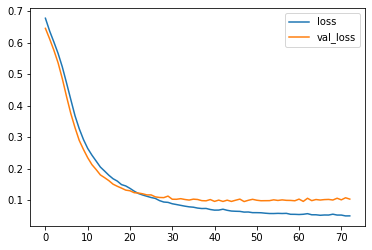

In [24]:
pd.DataFrame(model.history.history).plot();

In [25]:
# new model to execute with dropout
model = Sequential()

model.add(Dense(30, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(15, activation="relu"))
model.add(Dropout(0.5))

# sigmoid for binary data (end result is only 0 or 1)
model.add(Dense(1, activation="sigmoid"))

# binary_crossentropy for binary data
model.compile(loss="binary_crossentropy", optimizer="adam")

In [26]:
model.fit(X_train, y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[stopper])

Epoch 1/600
14/14 [==============================] - 1s 13ms/step - loss: 0.6859 - val_loss: 0.6790
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6852 - val_loss: 0.6690
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6719 - val_loss: 0.6635
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6677 - val_loss: 0.6591
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6416 - val_loss: 0.6371
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6253 - val_loss: 0.6020
Epoch 7/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6160 - val_loss: 0.5675
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5898 - val_loss: 0.5252
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5606 - val_loss: 0.4885
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5405 - val_loss: 0.4606
Epoch 11

14/14 [==============================] - 0s 5ms/step - loss: 0.1138 - val_loss: 0.1069
Epoch 84/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1106 - val_loss: 0.1028
Epoch 85/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1212 - val_loss: 0.0984
Epoch 86/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1013 - val_loss: 0.0913
Epoch 87/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1431 - val_loss: 0.0904
Epoch 88/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1026 - val_loss: 0.0940
Epoch 89/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1561 - val_loss: 0.0950
Epoch 90/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1072 - val_loss: 0.0891
Epoch 91/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0946 - val_loss: 0.1013
Epoch 92/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0997 - val_loss: 0.0982
Epoch 93/600


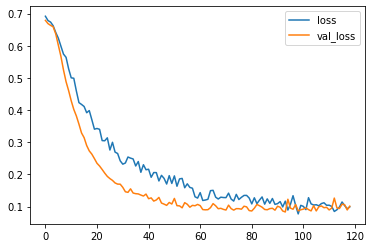

In [27]:
pd.DataFrame(model.history.history).plot();

In [30]:
preds = model.predict_classes(X_test)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [35]:
accuracy_score(y_test, preds)

0.9790209790209791

In [33]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [36]:
print(confusion_matrix(y_test, preds))

[[54  1]
 [ 2 86]]
